AMV Historical Data

In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [2]:
# 2. Đọc file dữ liệu
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [3]:
df

0        3700.0
1        3600.0
2        3500.0
3        3500.0
4        3500.0
         ...   
1308    14144.0
1309    14594.0
1310    14414.0
1311    14865.0
1312    15225.0
Name: Price, Length: 1313, dtype: float64

In [4]:
# 3. Chia dữ liệu train, test
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [5]:
# 4. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [6]:
# 5. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [7]:
# 6. Quá trình tạo index predict 30, 60, 90 ngày tiếp theo
last_index = df.index[-1]

In [8]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [9]:
# 7.Dự đoán giá trong 30, 60 và 90 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [10]:
# 8. Giá dự đoán trong 30, 60 và 90 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[24909.08379459 24927.73839372 24946.39299285 24965.04759198
 24983.70219111 25002.35679024 25021.01138937 25039.6659885
 25058.32058763 25076.97518676 25095.62978589 25114.28438502
 25132.93898415 25151.59358328 25170.24818241 25188.90278153
 25207.55738066 25226.21197979 25244.86657892 25263.52117805
 25282.17577718 25300.83037631 25319.48497544 25338.13957457
 25356.7941737  25375.44877283 25394.10337196 25412.75797109
 25431.41257022 25450.06716935]
Predicted closing prices for the next 60 days:
[24909.08379459 24927.73839372 24946.39299285 24965.04759198
 24983.70219111 25002.35679024 25021.01138937 25039.6659885
 25058.32058763 25076.97518676 25095.62978589 25114.28438502
 25132.93898415 25151.59358328 25170.24818241 25188.90278153
 25207.55738066 25226.21197979 25244.86657892 25263.52117805
 25282.17577718 25300.83037631 25319.48497544 25338.13957457
 25356.7941737  25375.44877283 25394.10337196 25412.75797109
 25431.41257022 25450.

In [11]:
# 9. Đánh giá độ chính xác thuật toán
# RMSE
valid_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# MAPE
valid_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# MSLE
valid_msle = mean_squared_log_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)

Validation RMSE: 9119.0167987431
Testing RMSE: 9119.0167987431
Validation MAPE: 67.34368705249025
Testing MAPE: 67.34368705249025
Validation MSLE: 0.27275229895149267
Testing MSLE: 0.27275229895149267


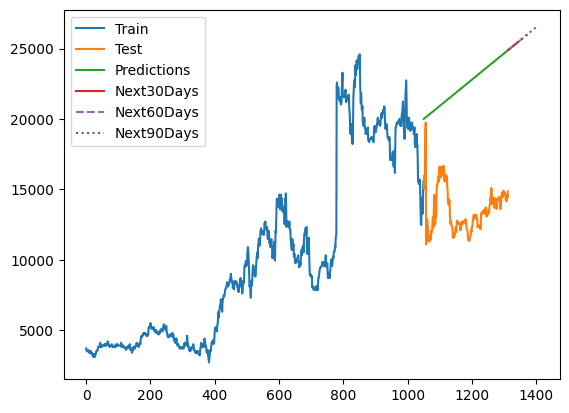

In [12]:
# 10. Vẽ hình
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predictions')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days', linestyle='--')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days', linestyle=':')
plt.legend()
plt.show()

DHT Historical Data

In [13]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [14]:
# 2. Đọc file dữ liệu
df = pd.read_csv('DHT Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [15]:
df

0       40400.0
1       39300.0
2       39500.0
3       39300.0
4       38600.0
         ...   
1307    11589.7
1308    11561.6
1309    11337.1
1310    11224.9
1311    10860.1
Name: Price, Length: 1312, dtype: float64

In [16]:
# 3. Chia dữ liệu train, test
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

In [17]:
# 4. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# 5. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [19]:
# 6. Quá trình tạo index predict 30, 60, 90 ngày tiếp theo
last_index = df.index[-1]

In [20]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [21]:
# 7.Dự đoán giá trong 30, 60 và 90 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [22]:
# 8. Giá dự đoán trong 30, 60 và 90 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[24890.42919546 24909.08379459 24927.73839372 24946.39299285
 24965.04759198 24983.70219111 25002.35679024 25021.01138937
 25039.6659885  25058.32058763 25076.97518676 25095.62978589
 25114.28438502 25132.93898415 25151.59358328 25170.24818241
 25188.90278153 25207.55738066 25226.21197979 25244.86657892
 25263.52117805 25282.17577718 25300.83037631 25319.48497544
 25338.13957457 25356.7941737  25375.44877283 25394.10337196
 25412.75797109 25431.41257022]
Predicted closing prices for the next 60 days:
[24890.42919546 24909.08379459 24927.73839372 24946.39299285
 24965.04759198 24983.70219111 25002.35679024 25021.01138937
 25039.6659885  25058.32058763 25076.97518676 25095.62978589
 25114.28438502 25132.93898415 25151.59358328 25170.24818241
 25188.90278153 25207.55738066 25226.21197979 25244.86657892
 25263.52117805 25282.17577718 25300.83037631 25319.48497544
 25338.13957457 25356.7941737  25375.44877283 25394.10337196
 25412.75797109 2543

In [23]:
# 9. Đánh giá độ chính xác thuật toán
# RMSE
valid_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# MAPE
valid_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# MSLE
valid_msle = mean_squared_log_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)

Validation RMSE: 9119.0167987431
Testing RMSE: 9119.0167987431
Validation MAPE: 67.34368705249025
Testing MAPE: 67.34368705249025
Validation MSLE: 0.27275229895149267
Testing MSLE: 0.27275229895149267


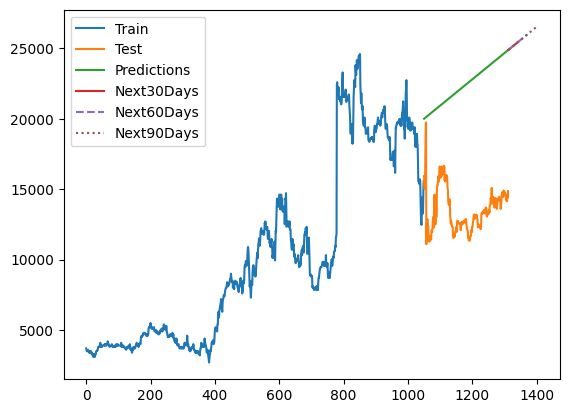

In [24]:
# 10. Vẽ hình
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predictions')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days', linestyle='--')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days', linestyle=':')
plt.legend()
plt.show()

DP3 Historical Data

In [25]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [26]:
# 2. Đọc file dữ liệu
df = pd.read_csv('DP3 Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [27]:
df

0       61600.0
1       61500.0
2       61000.0
3       61000.0
4       60900.0
         ...   
1132    76300.0
1133    74700.0
1134    74400.0
1135    74900.0
1136    73800.0
Name: Price, Length: 1137, dtype: float64

In [28]:
# 3. Chia dữ liệu train, test
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

In [29]:
# 4. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
# 5. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [31]:
# 6. Quá trình tạo index predict 30, 60, 90 ngày tiếp theo
last_index = df.index[-1]

In [32]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [33]:
# 7.Dự đoán giá trong 30, 60 và 90 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [34]:
# 8. Giá dự đoán trong 30, 60 và 90 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[21625.87434779 21644.52894692 21663.18354605 21681.83814518
 21700.49274431 21719.14734344 21737.80194257 21756.4565417
 21775.11114083 21793.76573996 21812.42033909 21831.07493822
 21849.72953735 21868.38413648 21887.03873561 21905.69333474
 21924.34793387 21943.002533   21961.65713212 21980.31173125
 21998.96633038 22017.62092951 22036.27552864 22054.93012777
 22073.5847269  22092.23932603 22110.89392516 22129.54852429
 22148.20312342 22166.85772255]
Predicted closing prices for the next 60 days:
[21625.87434779 21644.52894692 21663.18354605 21681.83814518
 21700.49274431 21719.14734344 21737.80194257 21756.4565417
 21775.11114083 21793.76573996 21812.42033909 21831.07493822
 21849.72953735 21868.38413648 21887.03873561 21905.69333474
 21924.34793387 21943.002533   21961.65713212 21980.31173125
 21998.96633038 22017.62092951 22036.27552864 22054.93012777
 22073.5847269  22092.23932603 22110.89392516 22129.54852429
 22148.20312342 22166.

In [35]:
# 9. Đánh giá độ chính xác thuật toán
# RMSE
valid_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# MAPE
valid_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# MSLE
valid_msle = mean_squared_log_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)

Validation RMSE: 9119.0167987431
Testing RMSE: 9119.0167987431
Validation MAPE: 67.34368705249025
Testing MAPE: 67.34368705249025
Validation MSLE: 0.27275229895149267
Testing MSLE: 0.27275229895149267


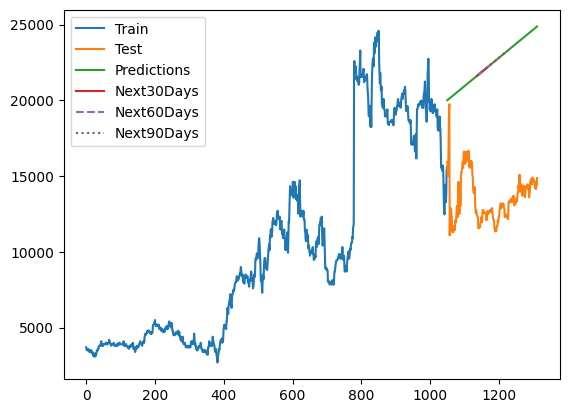

In [36]:
# 10. Vẽ hình
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predictions')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days', linestyle='--')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days', linestyle=':')
plt.legend()
plt.show()